    (1) Data Acquisition

* Use the command line to fetch the train.csv data from the path (not designated) and assign it to the variable train.
* You can inspect the data in detail from here.

In [3]:
import pandas as pd

train = pd.read_csv("~/Desktop/train.csv")
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


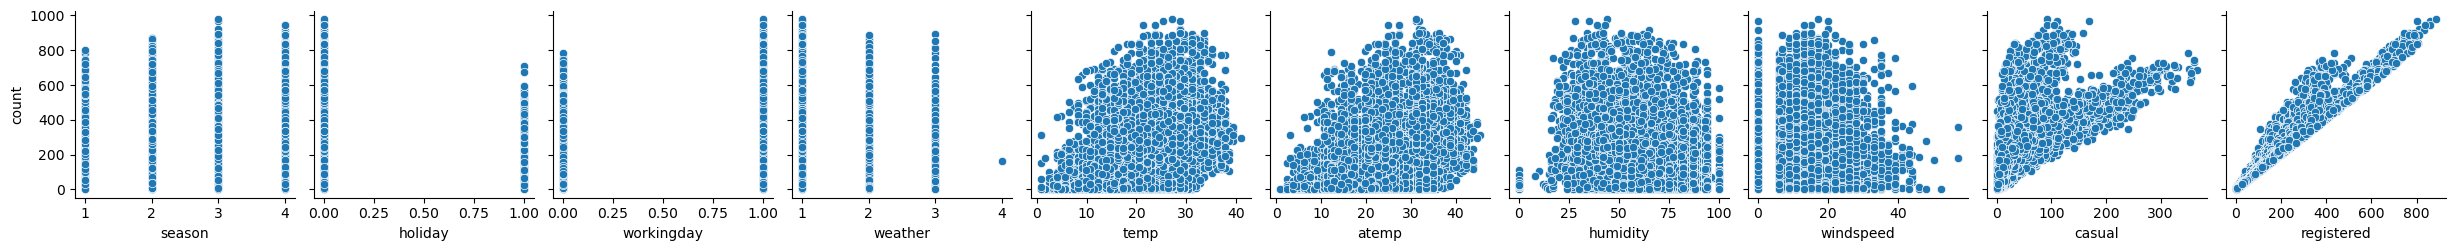

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["season", "holiday", "workingday", "weather", "temp", "atemp", 
            "humidity", "windspeed", "casual", "registered"]

sns.pairplot(train, x_vars=features, y_vars=["count"])
plt.show()


In [5]:
range_values = train.describe().loc[['max']]
print(range_values)


     season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
max     4.0      1.0         1.0      4.0  41.0  45.455     100.0    56.9969   

     casual  registered  count  
max   367.0       886.0  977.0  


In [6]:
correlation = train[["season", "holiday", "workingday", "weather", "temp", "atemp", 
            "humidity", "windspeed", "casual", "registered","count"]].corr()
print(correlation["count"])


season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64


    (2) Convert the datetime column to datetime data type and create 6 new columns for year, month, day, hour, minute, and second.

* Use to_datetime function: Refer to the link.
* Search keywords "pandas datetime extract year month day" for more information.

In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

    (3) Visualize the number of data for year, month, day, hour, minute, and second.

* Use sns.countplot for visualization.
* Use subplots to visualize all 6 graphs together.

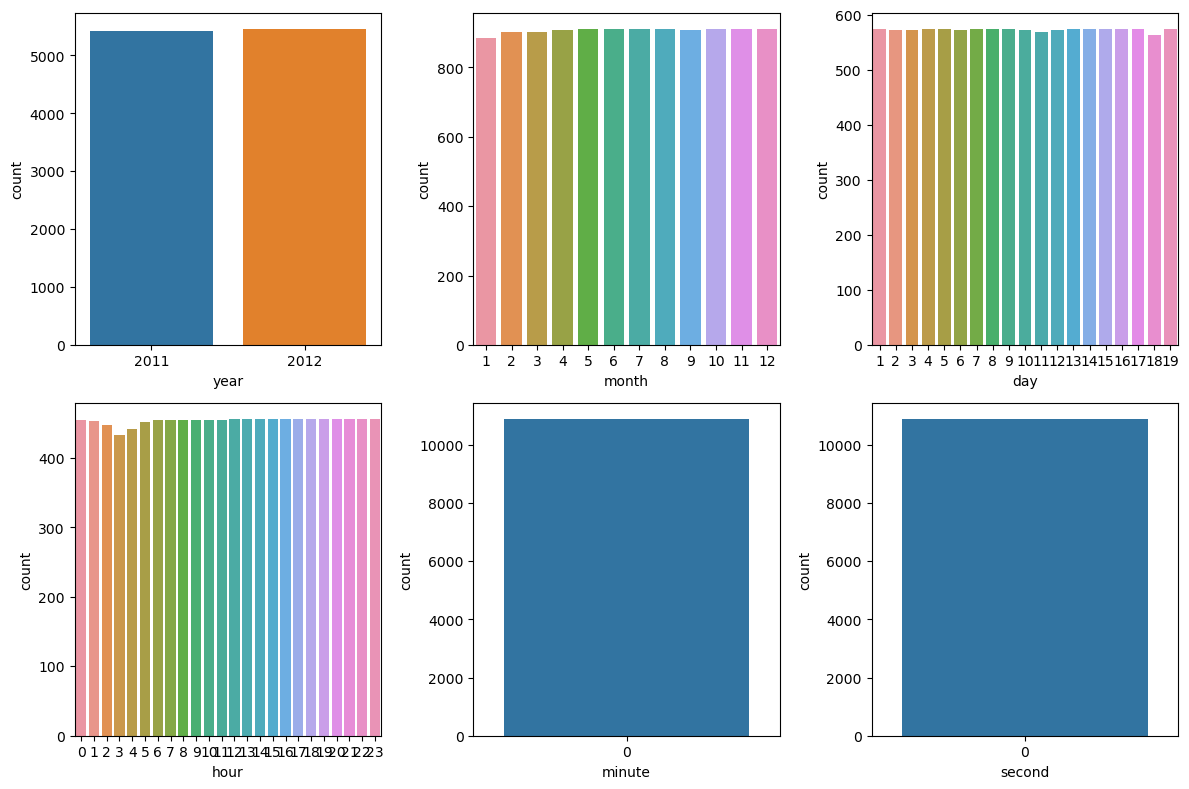

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3, figsize = (12,8))

sns.countplot(data = train, x = 'year', ax = axes[0,0])
sns.countplot(data = train, x = 'month', ax = axes[0,1])
sns.countplot(data = train, x = 'day', ax = axes[0,2])
sns.countplot(data = train, x = 'hour', ax = axes[1,0])
sns.countplot(data = train, x = 'minute', ax = axes[1,1])
sns.countplot(data = train, x = 'second', ax = axes[1,2])

plt.tight_layout()

plt.show()

    (4) Select X and y columns and split the data into train and test sets.

* Consider which data columns should be included in X (features). Experiment with adding or removing data columns. If you include all data columns (features), the error value may be unreasonably low. For example, do we need the casual and registered columns to predict count?
* Since we are trying to predict the count value, assign the data from the count column to the y variable.

In [9]:
from sklearn.model_selection import train_test_split
features = ['season', 'weather', 'temp', 'atemp', 
            'humidity', 'windspeed', 'year', 'month',
            'day', 'hour', 'minute', 'second']

y = train['count']

train_X, test_X, train_Y, test_Y = train_test_split(train[features],
                                                    y,test_size = 0.2)


In [10]:
train[features]

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,1,9.84,14.395,81,0.0000,2011,1,1,0,0,0
1,1,1,9.02,13.635,80,0.0000,2011,1,1,1,0,0
2,1,1,9.02,13.635,80,0.0000,2011,1,1,2,0,0
3,1,1,9.84,14.395,75,0.0000,2011,1,1,3,0,0
4,1,1,9.84,14.395,75,0.0000,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,0,0
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,0,0


    (5) Train the LinearRegression model.

* Import and train the LinearRegression model from sklearn.

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_X, train_Y)

LinearRegression()

    (6) Predict the values for X_test using the trained model and calculate the loss function.

* Use the trained model to predict the values for X_test.
* Calculate the loss function value between the predicted values and the target values.
* Calculate the MSE value and also the RMSE value.

In [12]:
predictions = model.predict(test_X)

In [13]:
predictions

array([167.6653801 , 328.42355912, 335.5508635 , ..., 202.38411134,
       288.53024463, 257.15910956])

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predictions, test_Y)
mse ** 0.5

143.87671701992213

    (7) Visualize the predicted results with x-axis as temp or humidity and y-axis as count.

* Create a visualization with temp data from X on the x-axis and count data on the y-axis.
* Create a visualization with humidity data from X on the x-axis and count data on the y-axis.\

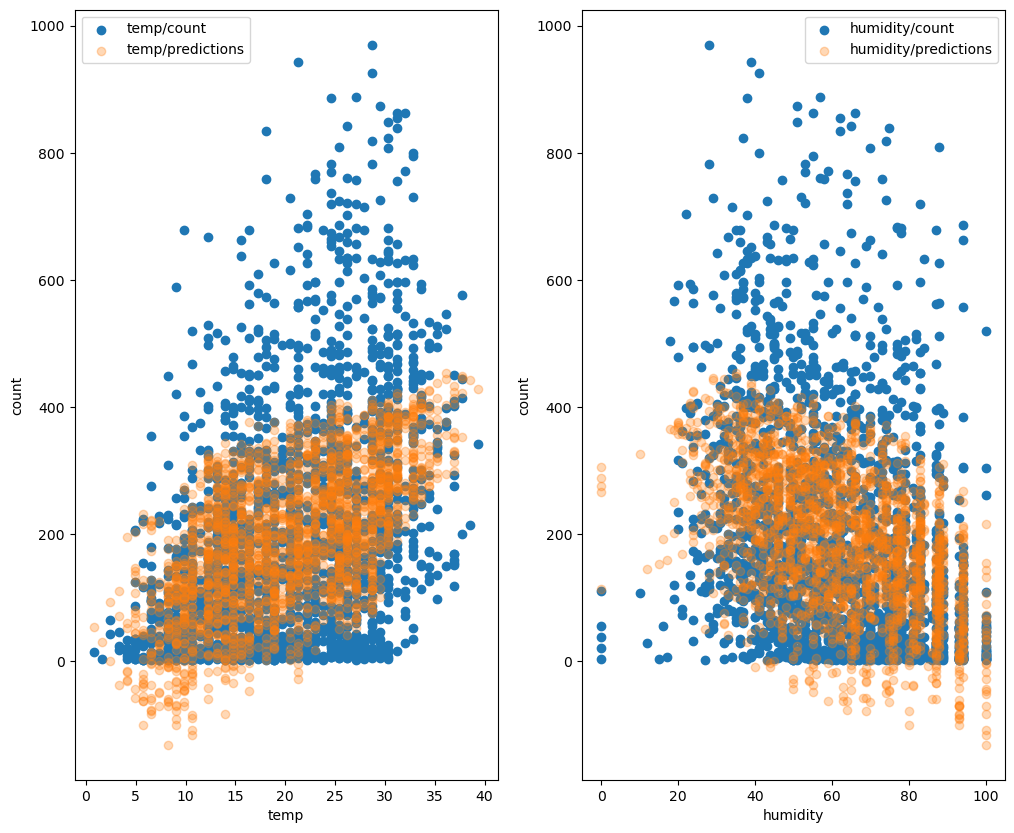

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,10))

plt.subplot(1,2,1)
plt.scatter(test_X['temp'], test_Y, label = 'temp/count')
plt.scatter(test_X['temp'], predictions, label = "temp/predictions", alpha = 0.3)
plt.xlabel('temp')
plt.ylabel('count')

plt.legend()

plt.subplot(1,2,2)
plt.scatter(test_X['humidity'], test_Y, label = 'humidity/count')
plt.scatter(test_X['humidity'], predictions, label = "humidity/predictions", alpha = 0.3)
plt.xlabel('humidity')
plt.ylabel('count')

plt.legend()
plt.show()

In [16]:
train["count"]

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [17]:
test_Y[test_Y>800]

9575    809
9887    835
7616    873
9609    887
9177    839
9200    808
9176    863
9344    925
8385    819
8793    862
8961    848
9320    970
8937    854
9512    886
8048    823
9464    842
9896    943
Name: count, dtype: int64